# **EDA: Hotels Booking**

# Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency

# Loading the Dataset

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Internship/CodexCue/Project 3/hotel_booking.csv')
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [3]:
dataset.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Cleaning Dataset

In [5]:
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
#taking mean of agent and company column
dataset['agent'] = dataset['agent'].fillna(dataset['agent'].mean())
dataset['company'] = dataset['company'].fillna(dataset['company'].mean())

In [7]:
#dropping null values
dataset = dataset.dropna()

In [8]:
#checking again
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Key Influences

## Seasonality

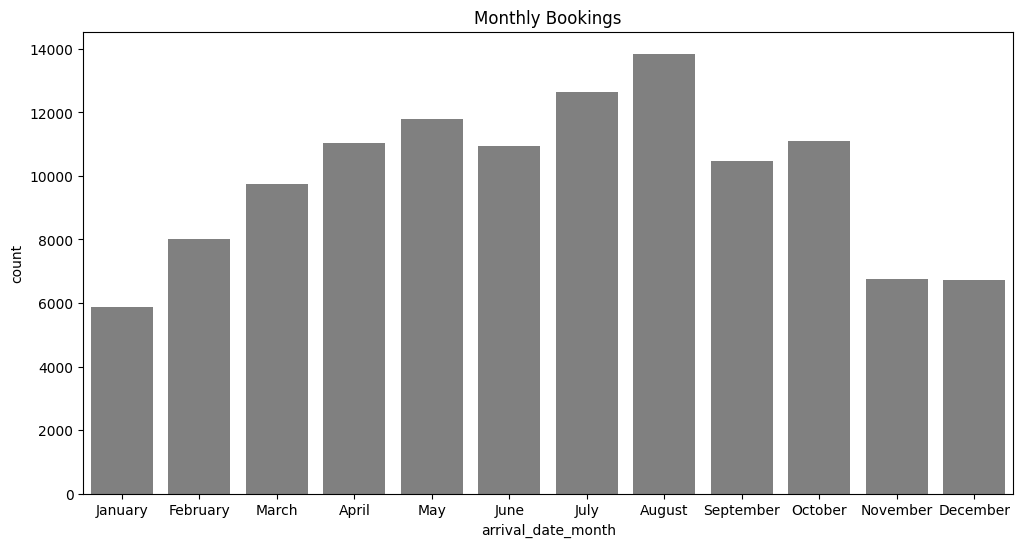

In [37]:
#bookings by month
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', data=dataset, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],color='grey')
plt.title('Monthly Bookings')
plt.show()

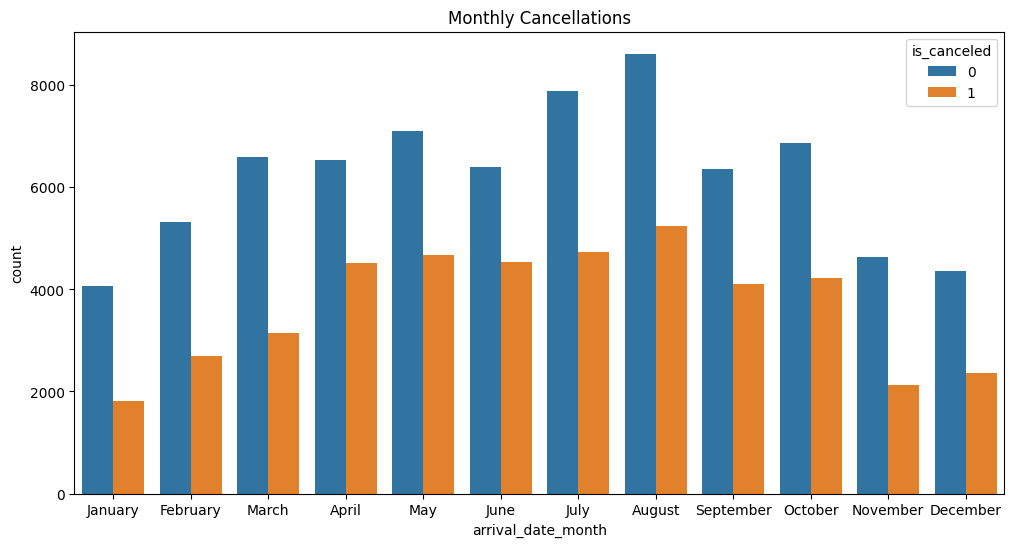

In [38]:
#cancellations by month
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', hue='is_canceled', data=dataset, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Cancellations')
plt.show()

## Lead Time

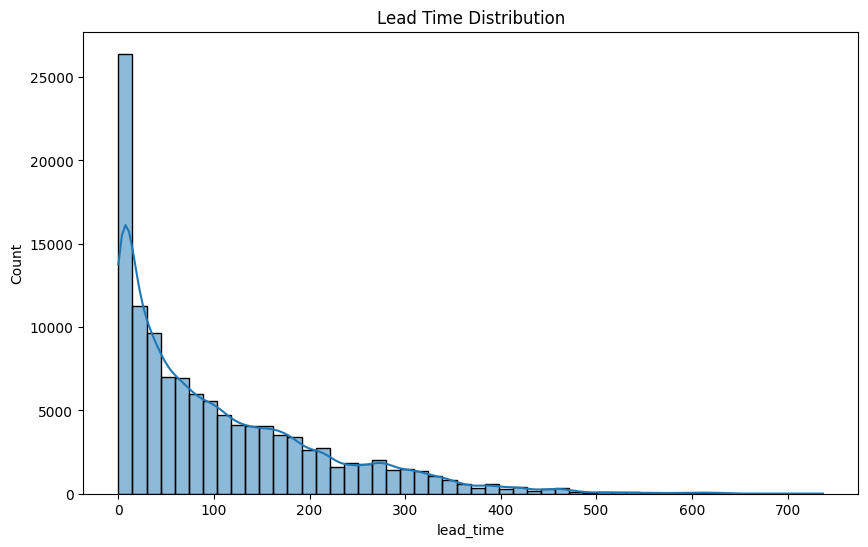

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['lead_time'], bins=50, kde=True)
plt.title('Lead Time Distribution')
plt.show()

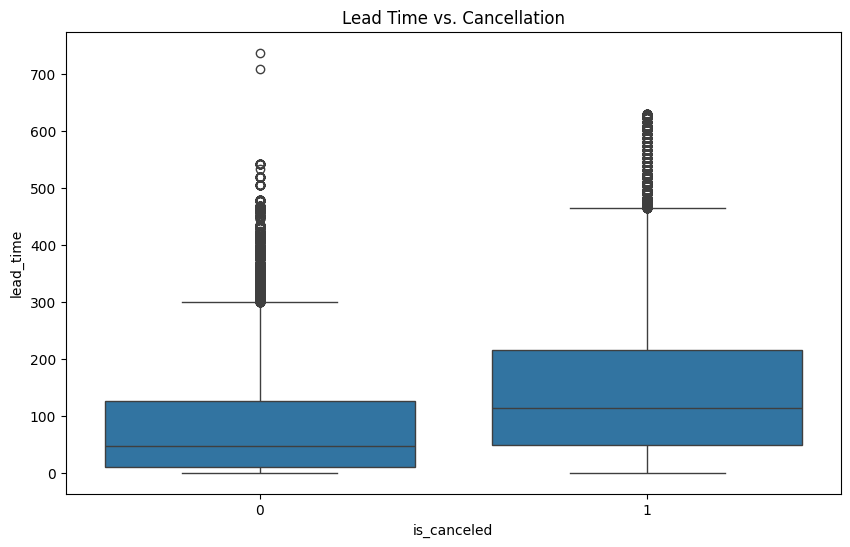

In [41]:
# Lead time vs. cancellation
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=dataset)
plt.title('Lead Time vs. Cancellation')
plt.show()

## Hotel Type

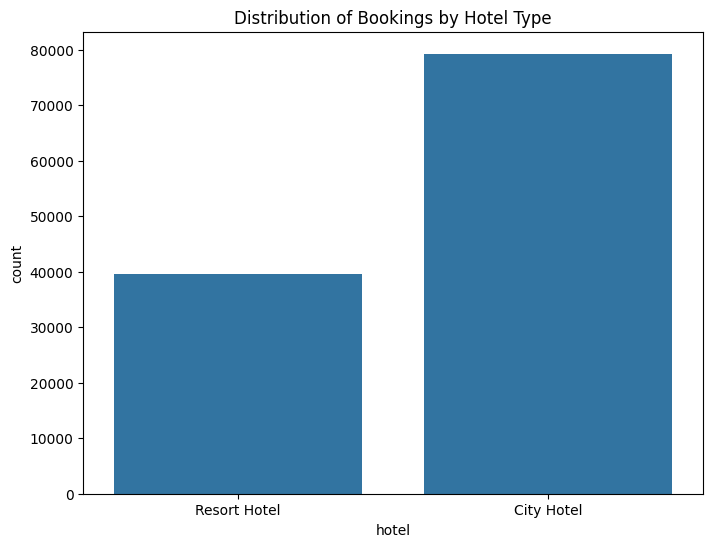

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hotel', data=dataset)
plt.title('Distribution of Bookings by Hotel Type')
plt.show()

## Country

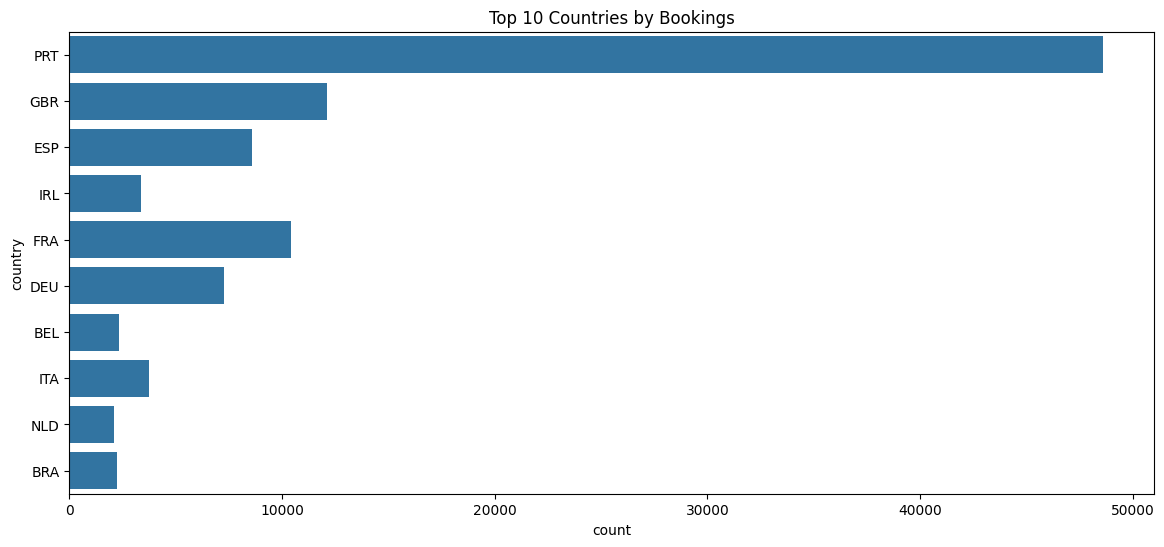

In [47]:
plt.figure(figsize=(14, 6))
top_countries = dataset['country'].value_counts().head(10).index
sns.countplot(y='country', data=dataset[dataset['country'].isin(top_countries)])
plt.title('Top 10 Countries by Bookings')
plt.show()

## Number of Adults,Children and babies

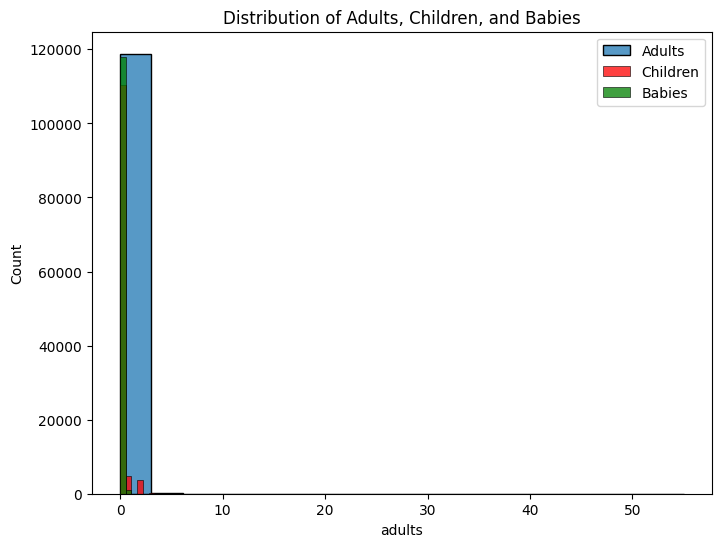

In [49]:
# Number of adults, children, and babies
plt.figure(figsize=(8, 6))
sns.histplot(dataset['adults'], kde=False, label='Adults')
sns.histplot(dataset['children'], kde=False, label='Children', color='red')
sns.histplot(dataset['babies'], kde=False, label='Babies', color='green')
plt.legend()
plt.title('Distribution of Adults, Children, and Babies')
plt.show()

# Statistical Analysis

## Regression analysis for cancellation rate

In [9]:
features = ['lead_time', 'previous_cancellations', 'booking_changes', 'adr', 'total_of_special_requests']
X = dataset[features]
y = dataset['is_canceled']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = log_reg.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7212223156714326
[[19682  2636]
 [ 7308  6044]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80     22318
           1       0.70      0.45      0.55     13352

    accuracy                           0.72     35670
   macro avg       0.71      0.67      0.67     35670
weighted avg       0.72      0.72      0.70     35670



## Chi-Square Test

In [15]:
# Chi-Square Test for Market Segment and Cancellation
contingency_table = pd.crosstab(dataset['market_segment'], dataset['is_canceled'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}")

Chi-Square Test: chi2 = 8392.685917219074, p-value = 0.0


## Customer Segmentation using Kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


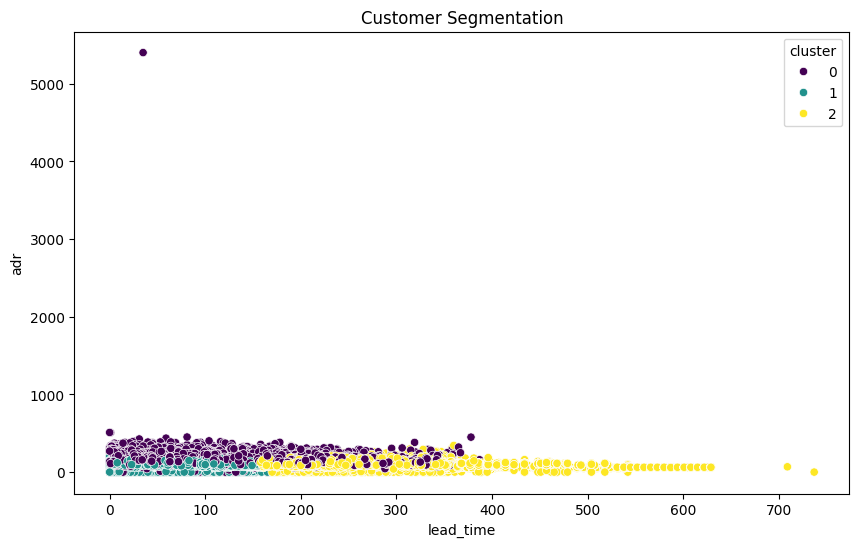

In [13]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dataset[['lead_time', 'adr', 'total_of_special_requests']])

kmeans = KMeans(n_clusters=3, random_state=42)
dataset['cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='adr', hue='cluster', data=dataset, palette='viridis')
plt.title('Customer Segmentation')
plt.show()

By following this structured approach, hoteliers can gain deep insights into consumer behavior, which can inform strategies to enhance occupancy rates, optimize pricing, and improve overall guest experiences.